**Изучение алгоритма "Решающее дерево"**

In [89]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

import sklearn.tree as tree
from sklearn.inspection import DecisionBoundaryDisplay

import graphviz

# Источники

1. <a href="https://hastie.su.domains/ISLR2/ISLRv2_website.pdf">ISLR</a> страница 336;
2. <a href="https://scikit-learn.org/stable/modules/tree.html#tree-regression">Документация sklearn</a>;

Решающим деревом можно решать как задачи регрессии так и классификации. Идея в том, что исходная область предикторов разбивается на подобласти и на каждой области предсказывается значение зависящее от наблюдений в ней.

Например для задачи регрессии можно предсказывать среднее значение отклика для выбранной области. Так в следующем примере представлено как может быть сформировано решеющее дерево для данных соответсвующий параболоиду.

Граф сверху описывает принцип принятия решений, рисунки снизу указывают как формировались предсказания.

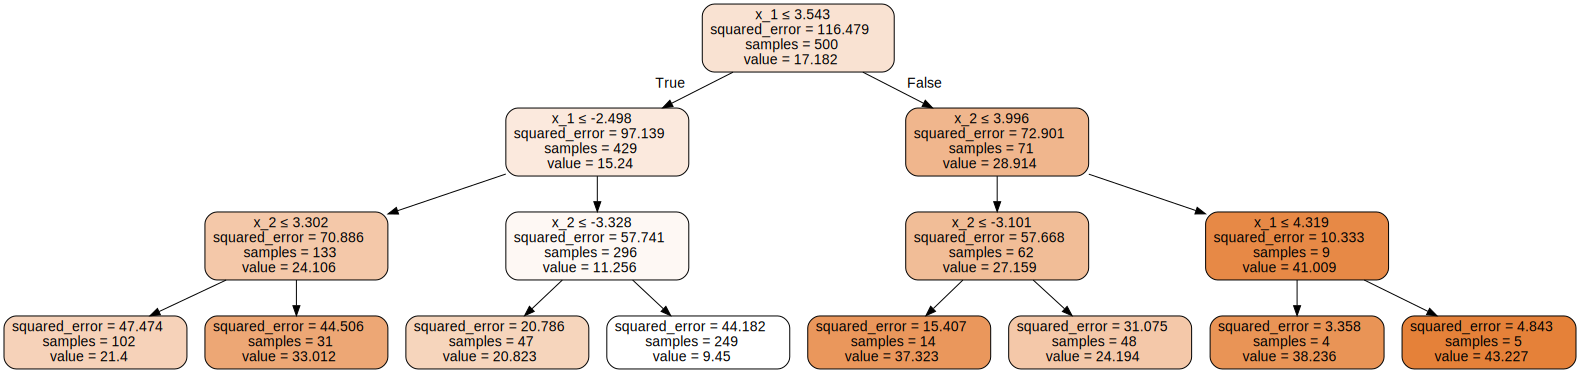

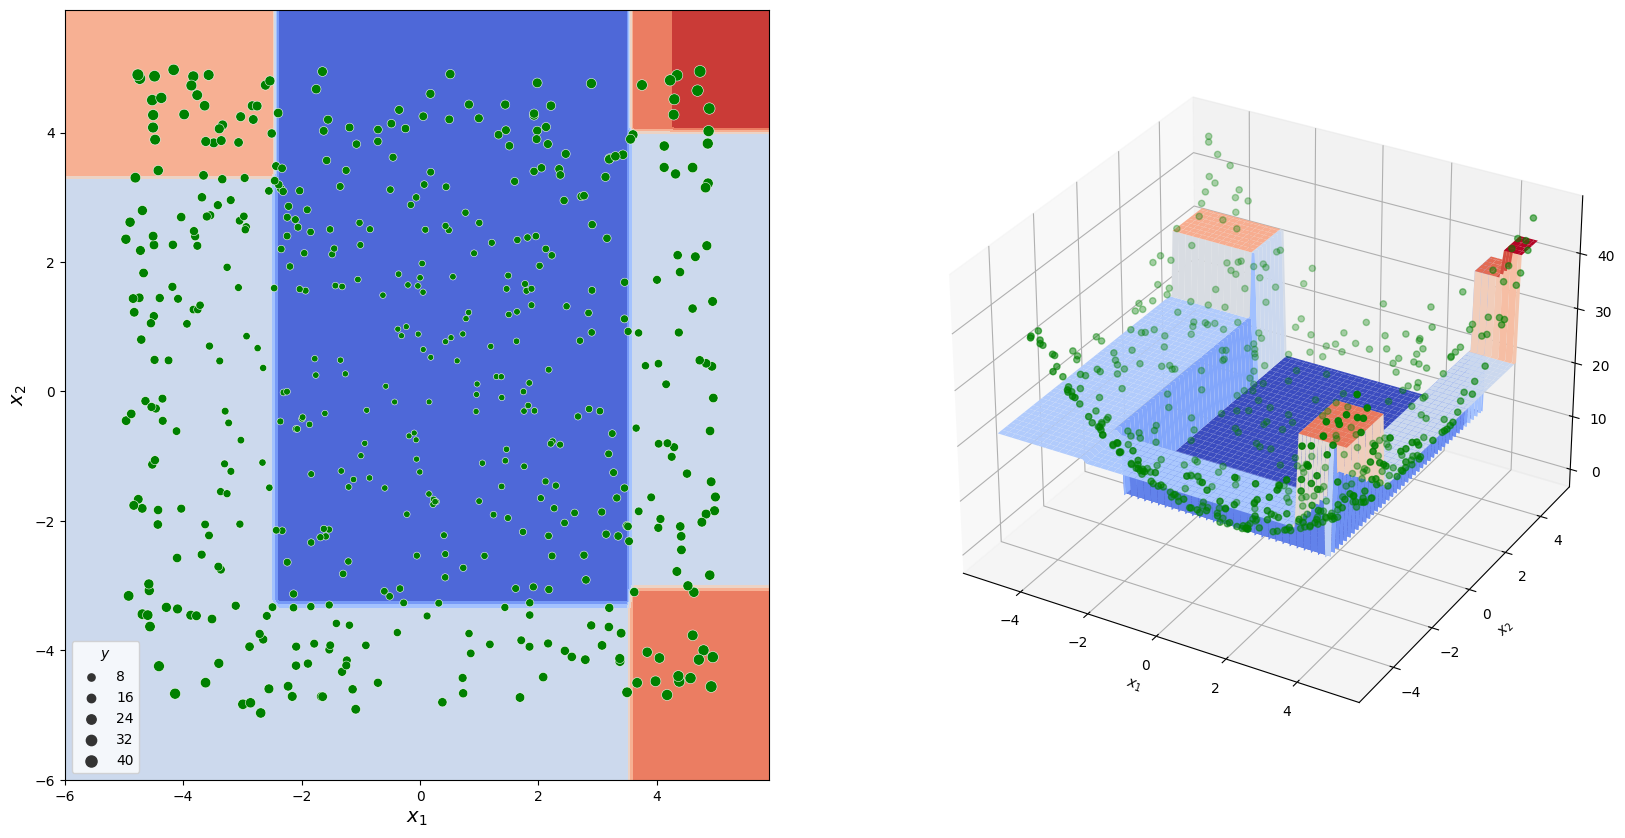

In [98]:
# подготовка обучающей выборки
sample_size = 500
np.random.seed(30)

x1_lim = [-5, 5]
x2_lim = [-5, 5]

sample_df = pd.DataFrame({
    "$x_1$" : np.random.uniform(*x1_lim, sample_size),
    "$x_2$" : np.random.uniform(*x2_lim, sample_size),
})

sample_df["$y$"] = sample_df["$x_1$"]**2 + sample_df["$x_2$"]**2

# формирование модели
my_first_tree = tree.DecisionTreeRegressor(\
    max_depth = 3
).fit(
    sample_df[["$x_1$", "$x_2$"]],
    sample_df["$y$"]
)

# сетка предстказаний
x1_range = np.arange(*x1_lim, 0.1)
x2_range = np.arange(*x2_lim, 0.1)
x1_mesh, x2_mesh = np.meshgrid(x1_range, x2_range)

mesh_df = pd.DataFrame({
    "$x_1$" : x1_mesh.ravel(),
    "$x_2$" : x2_mesh.ravel()
})
p_mesh = np.reshape(
    my_first_tree.predict(mesh_df),
    x1_mesh.shape
)

# визуализация
dot_data = tree.export_graphviz(
    my_first_tree, out_file=None,
    feature_names = ["x_1", "x_2"],
    filled=True, rounded=True,  
    special_characters=True
)
graph = graphviz.Source(dot_data)
display(graph)

fig = plt.figure(figsize = [20, 10])

ax1 = fig.add_subplot(121)
DecisionBoundaryDisplay.from_estimator(
    my_first_tree,
    mesh_df,
    cmap=cm.coolwarm,
    response_method="predict",
    ax = ax1,
)
sns.scatterplot(
    data = sample_df,
    x = "$x_1$", y = "$x_2$",
    size = "$y$",
    ax=ax1,
    color = "green"
)
plt.xlabel("$x_1$", fontsize = 14)
plt.ylabel("$x_2$", fontsize = 14)

ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(
    sample_df["$x_1$"],
    sample_df["$x_2$"],
    sample_df["$y$"],
    color = "green"
)
ax2.plot_surface(
    x1_mesh, x2_mesh, p_mesh,
    cmap=cm.coolwarm
)

plt.xlabel("$x_1$"); plt.ylabel("$x_2$");